# Student Performance in Exams

### Author: Bryson Byrd
### Last edited: November 22, 2022

#### Source: https://www.kaggle.com/code/spscientist/student-performance-in-exams/data

# Introduction

   This is a quick analysis on student performance on stardardized tests using different demographic metrics. The purpose of this analysis is to clean the data and to visualize the effects of different metrics with test scores and to quantify the differnce. 

In [38]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
#load in data
exams = pd.read_csv('exams.csv')
exams.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [100]:
#look at the data
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [42]:
#we will need this function a lot for the analysis. A quick function to output the average scores for each subject
def getscores(df):
    math = df['math score'].mean()
    reading = df['reading score'].mean()
    writing = df['writing score'].mean()
    
    scores = [math, reading, writing]
    
    return scores

In [43]:
#get average scores for the entire dataset
scores = getscores(exams)

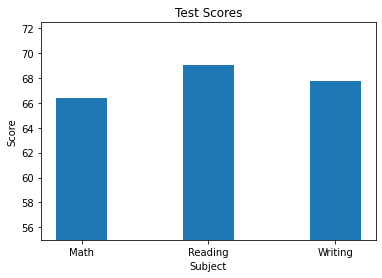

In [44]:
#plot the average scores
X = ['Math', 'Reading', 'Writing']
X_axis = np.arange(len(X))

plt.bar(X_axis, scores, 0.4,)

plt.xticks(X_axis, X)
plt.xlabel('Subject')
plt.ylabel('Score')
plt.ylim(55)
plt.title('Test Scores')
plt.show()

## Prep vs Unprep:

This section of the analysis focuses on the differences between the students who completed a test preparation course and the students who did not complete said course. 

In [46]:
#Filter the data for prep vs nonprep
prep = exams[(exams['test preparation course'] == 'completed')]
nonprep = exams[(exams['test preparation course'] != 'completed')]

In [47]:
#Calculate average scores for prep
prepscores = getscores(prep)
nonprepscores = getscores(nonprep)

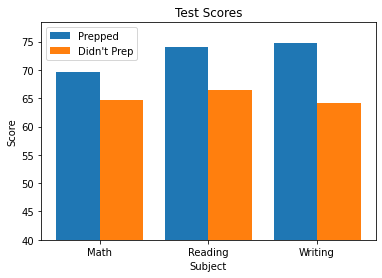

In [101]:
#plot the scores for prep vs nonprep
plt.bar(X_axis - 0.2, prepscores, 0.4, label = 'Prepped')
plt.bar(X_axis + 0.2, nonprepscores, 0.4, label ="Didn't Prep")

plt.xticks(X_axis, X)
plt.xlabel('Subject')
plt.ylabel('Score')
plt.ylim(40)
plt.title('Test Scores')
plt.legend()
plt.show()



In [75]:
#calculate the relative difference between prep and nonprep
diff = list()

for i, j in zip(prepscores,nonprepscores):
    diff.append((i-j)/i)
    
print("Preparing for the math portion of the test resulted in a", round(100*diff[0],2),"% increase in score.")
print("Preparing for the reading portion of the test resulted in a", round(100*diff[1],2),"% increase in score.")
print("Preparing for the writing portion of the test resulted in a", round(100*diff[2],2),"% increase in score.")

Preparing for the math portion of the test resulted in a 7.1 % increase in score.
Preparing for the reading portion of the test resulted in a 10.33 % increase in score.
Preparing for the writing portion of the test resulted in a 13.96 % increase in score.


#### Note: 
Preparing for these standardized tests is measurably beneficial versus not practicing. This is common sense but it is good to see the data reflect it. 

## Lunch Status:

This section of the analysis looks at the difference between the group of students who receive free or reduced lunch, versus the students receive on benefit, or have the standard lunch option. 

In [49]:
#difference between lunch status

In [50]:
#query data for lunch status
freelunch = exams[(exams['lunch'] != 'standard')]
standardlunch = exams[(exams['lunch'] == 'standard')]

In [51]:
#get scores for each group
freelunchscores = getscores(freelunch)
standardlunchscores = getscores(standardlunch)

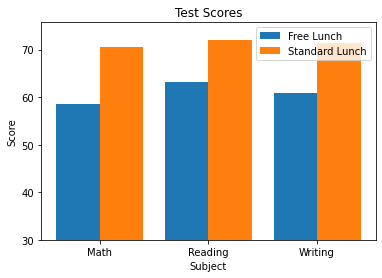

In [52]:
#plot the differences between the lunch status
plt.bar(X_axis - 0.2, freelunchscores, 0.4, label = 'Free Lunch')
plt.bar(X_axis + 0.2, standardlunchscores, 0.4, label ="Standard Lunch")

plt.xticks(X_axis, X)
plt.xlabel('Subject')
plt.ylabel('Score')
plt.title('Test Scores')
plt.ylim(30)
plt.legend()
plt.show()

In [80]:
diff = list()

for i, j in zip(standardlunchscores,freelunchscores):
    diff.append((i-j)/i)
    
print("Standard lunch students scored ", abs(round(100*diff[0],2)),"% better than free lunch students on the math portion.")
print("Standard lunch students scored ", abs(round(100*diff[1],2)),"% better than free lunch students on the reading portion.")
print("Standard lunch students scored ", abs(round(100*diff[2],2)),"% better than free lunch students on the writing portion.")

Standard lunch students scored  17.14 % better than free lunch students on the math portion.
Standard lunch students scored  12.36 % better than free lunch students on the reading portion.
Standard lunch students scored  14.64 % better than free lunch students on the writing portion.


#### Note: 
Overall, the standard lunch group score much better on the tests than their free/reduced lunch counterparts. This is an interesting outcome, because this is gauging economic conditions and their outcomes on test scores. So, by extenstion, it seems that lower income students tend to do worse, on average, than their classmates. A possible cause for the difference may be that free lunch recepients may not take a test prep course at the same rates as the students that have standard lunch. Further analysis is needed.

Text(0.5, 1.0, 'Test Prep for All Students')

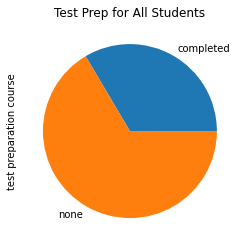

In [116]:
test = exams.groupby('test preparation course')['test preparation course'].count()
test.plot.pie()
plt.title('Test Prep for All Students')

Text(0.5, 1.0, 'Test Prep for Students with Free Lunch')

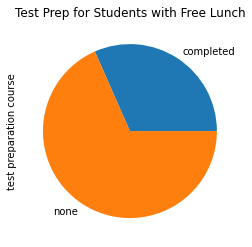

In [117]:
test1 = freelunch.groupby('test preparation course')['test preparation course'].count()
test1.plot.pie()
plt.title('Test Prep for Students with Free Lunch')

Text(0.5, 1.0, 'Test Prep for Students with Standard Lunch')

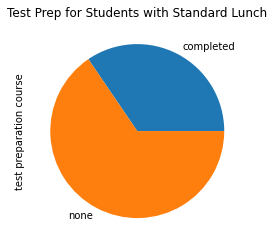

In [118]:
test2 = standardlunch.groupby('test preparation course')['test preparation course'].count()
test2.plot.pie()
plt.title('Test Prep for Students with Standard Lunch')

#### Note:

A quick glance at each pie chart shows that the completion of a test prep course is fairly uniform between the different lunch statuses. Test prep status isn't driving the differences between the groups.

## Male vs Female

This section of the analysis focuses on the difference in test scores between male students and female students.

In [53]:
#male vs female

In [54]:
#query the data for male and female students
male = exams[(exams['gender'] == 'male')]
female = exams[(exams['gender'] == 'female')]

In [55]:
#get scores for male and female students
malescores = getscores(male)
femalescores = getscores(female)

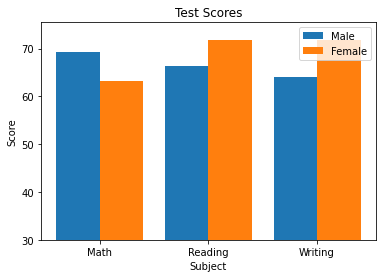

In [56]:
#plot the difference between male and female students
plt.bar(X_axis - 0.2, malescores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, femalescores, 0.4, label ="Female")

plt.xticks(X_axis, X)
plt.xlabel('Subject')
plt.ylabel('Score')
plt.ylim(30)
plt.title('Test Scores')
plt.legend()
plt.show()

In [78]:
#calculate the relative difference between male and female students
diff = list()

for i, j in zip(malescores,femalescores):
    diff.append((i-j)/i)
    
print("Men scored ", abs(round(100*diff[0],2)),"% better than women on the math portion.")
print("Women scored ", abs(round(100*diff[1],2)),"% better than men on the reading portion.")
print("Women scored ", abs(round(100*diff[2],2)),"% better than men on the writing portion.")

Men scored  8.92 % better than women on the math portion.
Women scored  8.42 % better than men on the reading portion.
Women scored  11.99 % better than men on the writing portion.


#### Note: 
On average, men scored better on the math portion, while women scored better on the reading and writing portions of the test.
This seems to reflect common knowledge, or at least, from my experience (being a man, and someone who studied mathematics in university).

## Parental Level of Education:

This section of the analysis focuses on the education level of students' parents.

In [58]:
#show the different levels of education recorded
exams['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [59]:
#query the data for each unique level of education
hs = exams[(exams['parental level of education'] == 'high school')]
some_hs = exams[(exams['parental level of education'] == 'some high school')]
some_col = exams[(exams['parental level of education'] == 'some college')]
assoc = exams[(exams['parental level of education'] == "associate's degree")]
bach = exams[(exams['parental level of education'] == "bachelor's degree")]
mast = exams[(exams['parental level of education'] == "master's degree")]

In [60]:
#get scores for each level of education
hs_scores = getscores(hs)
some_hs_scores = getscores(some_hs)
some_col_scores = getscores(some_col)
assoc_scores = getscores(assoc)
bach_scores = getscores(bach)
mast_scors = getscores(mast)

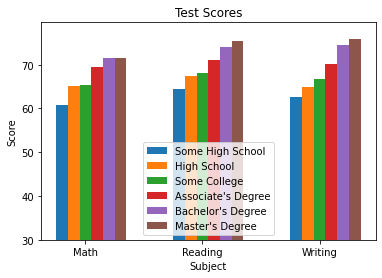

<Figure size 1800x1080 with 0 Axes>

In [93]:
#plot the scores for each level of education
plt.bar(X_axis - 0.2, some_hs_scores, 0.1, label = 'Some High School')
plt.bar(X_axis - 0.1, hs_scores, 0.1, label ="High School")
plt.bar(X_axis, some_col_scores, 0.1, label = 'Some College')
plt.bar(X_axis + 0.1, assoc_scores, 0.1, label ="Associate's Degree")
plt.bar(X_axis + 0.2, bach_scores, 0.1, label = "Bachelor's Degree")
plt.bar(X_axis + .3, mast_scors, 0.1, label = "Master's Degree")


plt.xticks(X_axis, X)
plt.xlabel('Subject')
plt.ylabel('Score')
plt.ylim(30)
plt.title('Test Scores')
plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

In [91]:
#calculate the relative difference from the average scores for each education level
educationscores = [hs_scores,some_hs_scores,some_col_scores,assoc_scores,bach_scores, mast_scors]
educationnames = list(exams['parental level of education'].unique())
for score, name in zip(educationscores, educationnames):
    diff = list()
    for i, j in zip(score,scores):
        diff.append((i-j)/i)
    
    print("Students with parents that completed: ",name +'.',"Scored", round(100*diff[0],2),"%, relative to the average on the math portion.")
    print("Students with parents that completed: ",name+'.',"Scored", round(100*diff[1],2),"%, relative to the average on the reading portion.")
    print("Students with parents that completed: ",name+'.',"Scored", round(100*diff[2],2),"%, relative to the average on the writing portion.")
    print('')

Students with parents that completed:  high school. Scored -1.82 %, relative to the average on the math portion.
Students with parents that completed:  high school. Scored -2.38 %, relative to the average on the reading portion.
Students with parents that completed:  high school. Scored -4.46 %, relative to the average on the writing portion.

Students with parents that completed:  some high school. Scored -9.38 %, relative to the average on the math portion.
Students with parents that completed:  some high school. Scored -7.13 %, relative to the average on the reading portion.
Students with parents that completed:  some high school. Scored -8.31 %, relative to the average on the writing portion.

Students with parents that completed:  some college. Scored -1.68 %, relative to the average on the math portion.
Students with parents that completed:  some college. Scored -1.41 %, relative to the average on the reading portion.
Students with parents that completed:  some college. Scored -1

#### Note: 
The common trend associated with parental education level is: The more educated the parents, the better the kids score on standardized tests.

Possible explanations may be that more educated families value studying for tests more, causing a higher rate of test preparation, better study habits, etc.
Or simply, the more educated the parents are, the smarted the children are, on average.

The largest difference is associated with the writing section of the test. Graduate degrees require proficieny in writing, so these skills may translate from parents to children. 

Text(0.5, 1.0, 'Test Prep for All Students')

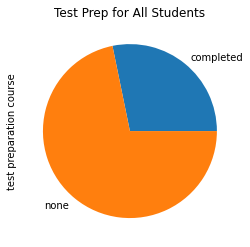

In [121]:
eduplot1 = hs.groupby('test preparation course')['test preparation course'].count()
eduplot1.plot.pie()
plt.title('Test Prep for All Students')

Text(0.5, 1.0, 'Test Prep for All Students')

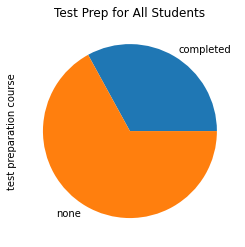

In [122]:
eduplot2 = some_hs.groupby('test preparation course')['test preparation course'].count()
eduplot2.plot.pie()
plt.title('Test Prep for All Students')

Text(0.5, 1.0, 'Test Prep for All Students')

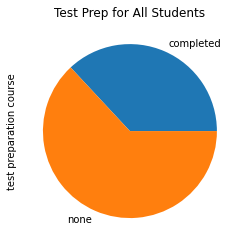

In [123]:
eduplot3 = some_col.groupby('test preparation course')['test preparation course'].count()
eduplot3.plot.pie()
plt.title('Test Prep for All Students')

Text(0.5, 1.0, 'Test Prep for All Students')

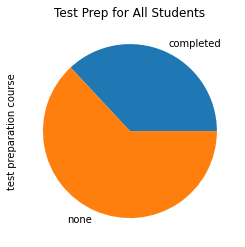

In [124]:
eduplot4 = assoc.groupby('test preparation course')['test preparation course'].count()
eduplot4.plot.pie()
plt.title('Test Prep for All Students')

Text(0.5, 1.0, 'Test Prep for All Students')

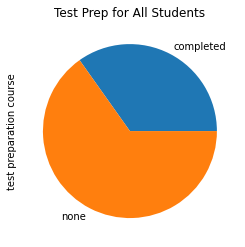

In [127]:
eduplot5 = bach.groupby('test preparation course')['test preparation course'].count()
eduplot5.plot.pie()
plt.title('Test Prep for All Students')

Text(0.5, 1.0, "'Test Prep Rates of Masters'")

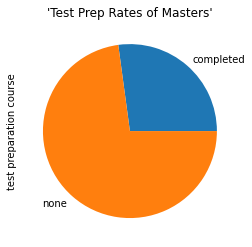

In [129]:
eduplot6 = mast.groupby('test preparation course')['test preparation course'].count()
eduplot6.plot.pie()
plt.title("'Test Prep Rates of Masters'")

#### Note:

The proportion of students who test prepped was the worst with the students who's parents have Masters' Degrees. This is very suprising, I would expect that the higher the education level of the parents, the more those students are taking prep courses. 

Test prep status seems to have little effect, if you determine the parents education level first.

## Ethnic Group:

This section of the analysis focuses on the difference between ethnic groups. The ethnic groups were anonymized (for good reason), so each unique ethnic group is label with a letter. 

In [63]:
#show each unique ethnic group recorded
exams['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [64]:
#query data for each ethnic group
groupA = exams[(exams['race/ethnicity'] == 'group A')]
groupB = exams[(exams['race/ethnicity'] == 'group B')]
groupC = exams[(exams['race/ethnicity'] == 'group C')]
groupD = exams[(exams['race/ethnicity'] == 'group D')]
groupE = exams[(exams['race/ethnicity'] == 'group E')]

In [65]:
#get scores for each group
groupA_scores = getscores(groupA)
groupB_scores = getscores(groupB)
groupC_scores = getscores(groupC)
groupD_scores = getscores(groupD)
groupE_scores = getscores(groupE)

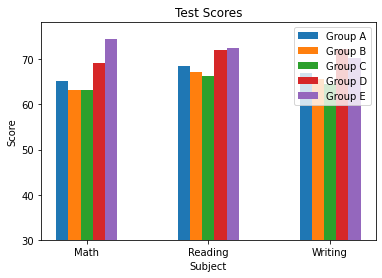

<Figure size 1440x720 with 0 Axes>

In [97]:
#plot scores for each group
plt.bar(X_axis - 0.2, groupA_scores, 0.1, label = 'Group A')
plt.bar(X_axis - 0.1, groupB_scores, 0.1, label ="Group B")
plt.bar(X_axis, groupC_scores, 0.1, label = 'Group C')
plt.bar(X_axis + 0.1, groupD_scores, 0.1, label ="Group D")
plt.bar(X_axis + 0.2, groupE_scores, 0.1, label = "Group E")


plt.xticks(X_axis, X)
plt.xlabel('Subject')
plt.ylabel('Score')
plt.title('Test Scores')
plt.ylim(30)
plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

In [83]:
#Calculate the difference in scores for each ethnic group relative to the average scores
groupscores = [groupA_scores,groupB_scores,groupC_scores,groupD_scores,groupE_scores]
groupnames =['Group A', 'Group B','Group C','Group D','Group E']
for score, name in zip(groupscores, groupnames):
    diff = list()
    for i, j in zip(score,scores):
        diff.append((i-j)/i)
    
    print(name,"preformed", round(100*diff[0],2),"%, relative to the average on the math portion.")
    print(name,"preformed", round(100*diff[1],2),"%, relative to the average on the reading portion.")
    print(name,"preformed", round(100*diff[2],2),"%, relative to the average on the writing portion.")
    print('')

Group A preformed -1.81 %, relative to the average on the math portion.
Group A preformed -0.65 %, relative to the average on the reading portion.
Group A preformed -1.14 %, relative to the average on the writing portion.

Group B preformed -5.11 %, relative to the average on the math portion.
Group B preformed -2.83 %, relative to the average on the reading portion.
Group B preformed -3.04 %, relative to the average on the writing portion.

Group C preformed -5.17 %, relative to the average on the math portion.
Group C preformed -3.94 %, relative to the average on the reading portion.
Group C preformed -4.98 %, relative to the average on the writing portion.

Group D preformed 4.15 %, relative to the average on the math portion.
Group D preformed 4.28 %, relative to the average on the reading portion.
Group D preformed 6.26 %, relative to the average on the writing portion.

Group E preformed 10.84 %, relative to the average on the math portion.
Group E preformed 4.86 %, relative to t

#### Note: 
Overall, Group C preformed the worst on the three tests, and Group E preformed the best.
Group D is a close second, right behind Group E, for best test scores. 
Group A preformed slightly worse than average, while Group B preformed slightly better than the worst group, Group C. 

# Conclusion

The metric with the largest discrepancy is the lunch status of the student. The average increase in score between receiving free lunch versus the standard plan was 15.07%. That is substantial, about one standard deviation increase in score.  
The next largest discrepancy was between test prepping, which on average, increased your score by around 10.5 %.
Another factor that had impact was parental education level, which showed a large difference in performance for students whose  parents completed some high school and students whose parents earned a Masters' Degree.

For the most part, the difference between each factor is relatively small. 

The factors listed above are the ones that make the largest impact on test performance. More factors are necessary for a more in-depth analysis of student performance.